# Titanic Survivor Predictions

This notebook is using various Python-based machine learning and data science libraries to predict the survivals on the Titanic.

## 1. Problem

Building a predictive model that answer the question  of what sorts of people were more likely to survive using the using passenger data (ie name, age, gender, socio-economic class, etc).

## 2. Data

The data we're using is from Kaggle's Titanic - Machine learning from disaster Competition.
https://www.kaggle.com/competitions/titanic/data

## 3. Evaluation

The evaluation is a file with prediction that whether the passenger survived the sinking of Titanic or not.
https://www.kaggle.com/competitions/titanic/overview/evaluation

## 4. Features

Some information about the data:

* Here we gained access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One is trained.csv and the other is test.csv

* There are 891 passengers in the training set.

* There are 400+ passengers in the test set.

**Create data dictionary**

* pclass: A proxy for socio-economic status (SES)
    * 1st = Upper
    * 2nd = Middle
    * 3rd = Lower

* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* sibsp: The dataset defines family relations in this way...
    * Sibling = brother, sister, stepbrother, stepsister
    * Spouse = husband, wife (mistresses and fiancés were ignored)
* parch: The dataset defines family relations in this way...
    * Parent = mother, father
    * Child = daughter, son, stepdaughter, stepson
    * Some children travelled only with a nanny, therefore parch=0 for them.
* survival:	0 = No, 1 = Yes
* ticket:	Ticket number
* fare:	Passenger fare
* cabin:	Cabin number
* embarked:	Port of Embarkation
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton

## Preparing the tools

Here, We are using pandas, numpy and matplotlib for data analysis and manipulation.

In [ ]:
# Import all the tools needed

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

##Load Data

In [ ]:
df = pd.read_csv("drive/MyDrive/Titanic-Survival/train.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Exploration (Exploratory Data Analysis or EDA)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Counting how many of each class are there
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

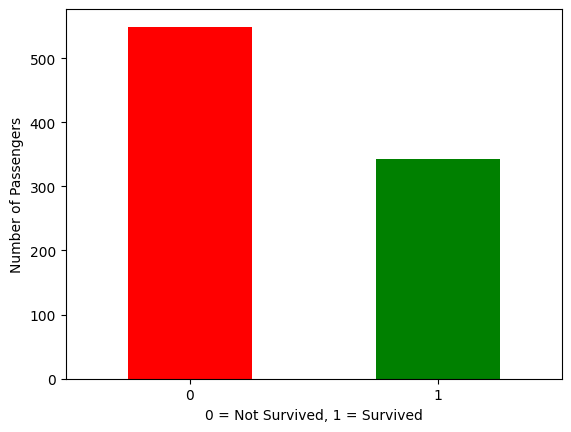

In [ ]:
df["Survived"].value_counts().plot(kind="bar", color = ["red", "green"])
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Number of Passengers")
plt.xticks(rotation = 0)

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Titanic Survival According to Sex

In [ ]:
# Counting how many males and females were there on the ship
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
# Comparing the Sex column to the Survived column
pd.crosstab(df["Survived"], df["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


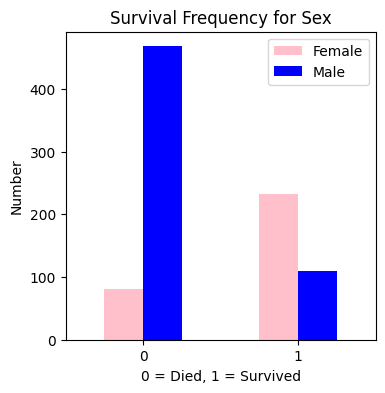

In [ ]:
# Create a plot of Crosstab
pd.crosstab(df["Survived"], df["Sex"]).plot(kind = "bar",
                                            figsize = (4,4),
                                            color = ["pink", "blue"])
plt.title("Survival Frequency for Sex")
plt.xlabel("0 = Died, 1 = Survived")
plt.ylabel("Number")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0);

## Survival according to Proxy class

In [ ]:
# Counting the number of people in each class
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

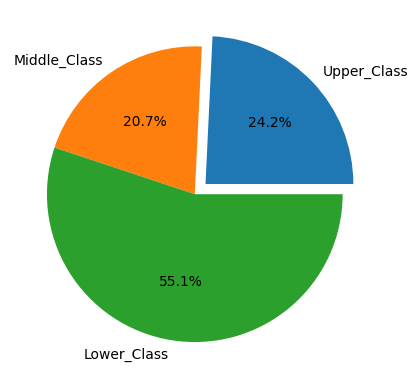

In [ ]:
# Plot of Proxy Class
explode = [0.1,0,0]
sizes = [216, 184, 491]
plt.pie(sizes, labels = ['Upper_Class', 'Middle_Class', 'Lower_Class'],
        autopct = "%1.1f%%",
        explode = explode);

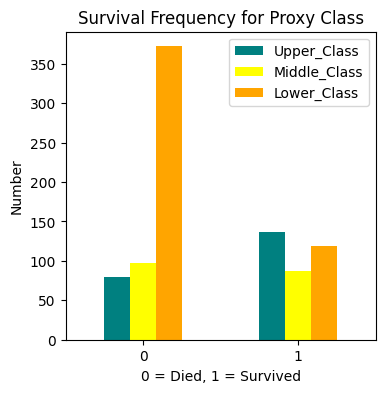

In [ ]:
pd.crosstab(df["Survived"], df["Pclass"]).plot(kind = "bar",
                                               figsize = (4,4),
                                               color = ["teal", "yellow", "orange"])
plt.title("Survival Frequency for Proxy Class")
plt.xlabel("0 = Died, 1 = Survived")
plt.ylabel("Number")
plt.legend(["Upper_Class", "Middle_Class", "Lower_Class"])
plt.xticks(rotation = 0);

In [ ]:
df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


<ipython-input-20-016328965208>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


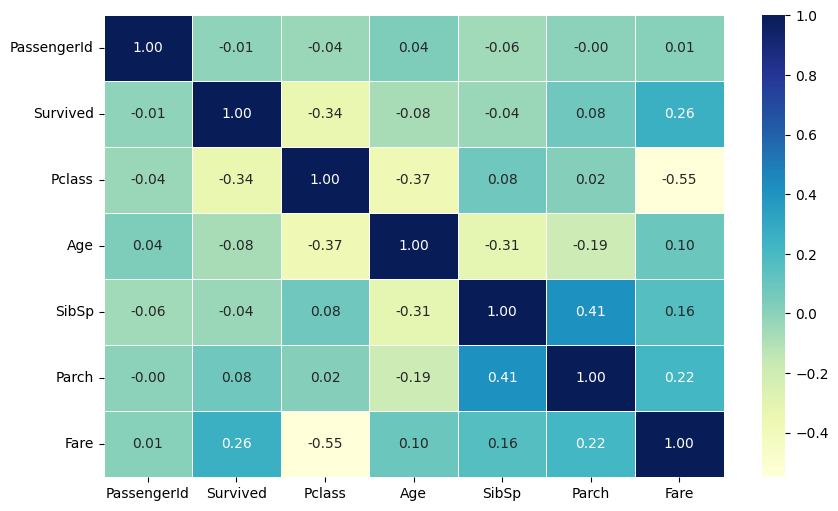

In [ ]:
# Make a correlation Matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt =".2f",
                 cmap="YlGnBu");

In [ ]:
df["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

## Age vs. Fare

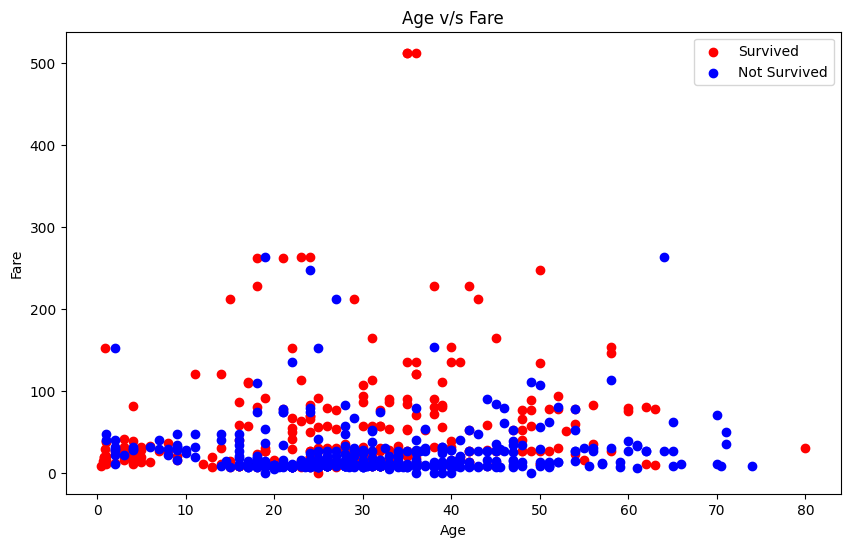

In [ ]:
# Creating a figure
plt.figure(figsize = (10,6))

# Plot for survived Passengers
plt.scatter(df.Age[df.Survived == 1],
            df.Fare[df.Survived == 1],
            c = "red");

# Plot for dead Passengers
plt.scatter(df.Age[df.Survived == 0],
            df.Fare[df.Survived == 0],
            c = "blue");

# Add some helpful info
plt.title("Age v/s Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(["Survived", "Not Survived"]);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Making a copy of original DataFrame

In [ ]:
# Make a copy
df_tmp = df.copy()

In [ ]:
df_tmp.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


## Converting the String values into Categorical values

In [ ]:
pd.api.types.is_string_dtype(df_tmp["Cabin"])

True

In [ ]:
# Find the columns having String Data Type
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

Name
Sex
Ticket
Cabin
Embarked


In [ ]:
df_tmp.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Converting the string values into categorical values
for label, value in df_tmp.items():
  if pd.api.types.is_string_dtype(value):
     df_tmp[label] = value.astype("category").cat.as_ordered()

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 122.0 KB


In [ ]:
df_tmp.Cabin.cat.categories

Index(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31', 'A32',
       ...
       'E8', 'F E69', 'F G63', 'F G73', 'F2', 'F33', 'F38', 'F4', 'G6', 'T'],
      dtype='object', length=147)

In [ ]:
df_tmp.Cabin.cat.codes

0      -1
1      81
2      -1
3      55
4      -1
       ..
886    -1
887    30
888    -1
889    60
890    -1
Length: 891, dtype: int16

In [ ]:
df_tmp.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Filling and turning Categorical values into numbers

In [ ]:
# Check for columns with non-numeric values
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

Name
Sex
Ticket
Cabin
Embarked


In [ ]:
pd.Categorical(df_tmp.Cabin).codes

array([ -1,  81,  -1,  55,  -1,  -1, 129,  -1,  -1,  -1, 145,  49,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1, 111,  -1,  13,  -1,  -1,
        -1,  63,  -1,  -1,  -1,  41,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
       101,  -1,  23,  71,  -1,  -1,  -1,  -1,  -1,  21,  80,  -1,  -1,
        -1, 142,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1, 140,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  63,  -1,  -1,
        -1, 122,  -1,  -1,  -1,  12,  91,  -1,  -1,  -1,  -1,  98,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  52,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  36,  -1,  -1,  -1,  -1, 116,  98,  -1,  -1,  -1, 138,  -1,
        -1,  -1,  -1,  -1,  -1,  -1, 107,  55,  -1,  45,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1, 141,  -1,  -1,  61,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1, 123,  -1,  -1,
        -1,  18,  -1,  -1,  -1,  14,  -1,  -1,  69,  -1,  -1,  -

In [ ]:
pd.Categorical(df_tmp.Cabin).codes + 1

array([  0,  82,   0,  56,   0,   0, 130,   0,   0,   0, 146,  50,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 112,   0,  14,   0,   0,
         0,  64,   0,   0,   0,  42,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       102,   0,  24,  72,   0,   0,   0,   0,   0,  22,  81,   0,   0,
         0, 143,   0,   0,   0,   0,   0,   0,   0,   0, 141,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64,   0,   0,
         0, 123,   0,   0,   0,  13,  92,   0,   0,   0,   0,  99,   0,
         0,   0,   0,   0,   0,   0,  53,   0,   0,   0,   0,   0,   0,
         0,  37,   0,   0,   0,   0, 117,  99,   0,   0,   0, 139,   0,
         0,   0,   0,   0,   0,   0, 108,  56,   0,  46,   0,   0,   0,
         0,   0,   0,   0,   0, 142,   0,   0,  62,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 124,   0,   0,
         0,  19,   0,   0,   0,  15,   0,   0,  70,   0,   0,   

In [ ]:
# Turning the Categorical data into numbers and filling the missing values
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    # Add a binary column to indicate whether the sample had missing values
    df_tmp[label + "_is_missing"] = pd.isnull(content)
    # Turn the Categories into numbers
    df_tmp[label] = pd.Categorical(content).codes + 1

In [ ]:
# Checking if there is any categorical value
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

## Filling the missing Numerical Values

In [ ]:
# Finding the columns having Numeric data type
for label, content in df_tmp.items():
  if(pd.api.types.is_numeric_dtype(content)):
    print(label)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked
Name_is_missing
Sex_is_missing
Ticket_is_missing
Cabin_is_missing
Embarked_is_missing


In [ ]:
df_tmp.isna().sum()

PassengerId              0
Survived                 0
Pclass                   0
Name                     0
Sex                      0
Age                    177
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Cabin                    0
Embarked                 0
Name_is_missing          0
Sex_is_missing           0
Ticket_is_missing        0
Cabin_is_missing         0
Embarked_is_missing      0
dtype: int64

In [ ]:
# Check for which numeric column values are null
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

Age


In [ ]:
# Filling the median in numeric rows
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Adding a binary column which tells us if the data is missing
      df_tmp[label + "_is_missing"] = pd.isnull(content)
      # Filling the missing numeric value
      df_tmp[label] = content.fillna(content.median())

In [ ]:
# Checking if there is any missing numerical value
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

In [ ]:
df_tmp.isna().sum()

PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Name_is_missing        0
Sex_is_missing         0
Ticket_is_missing      0
Cabin_is_missing       0
Embarked_is_missing    0
Age_is_missing         0
dtype: int64

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Survived             891 non-null    int64  
 2   Pclass               891 non-null    int64  
 3   Name                 891 non-null    int16  
 4   Sex                  891 non-null    int8   
 5   Age                  891 non-null    float64
 6   SibSp                891 non-null    int64  
 7   Parch                891 non-null    int64  
 8   Ticket               891 non-null    int16  
 9   Fare                 891 non-null    float64
 10  Cabin                891 non-null    int16  
 11  Embarked             891 non-null    int8   
 12  Name_is_missing      891 non-null    bool   
 13  Sex_is_missing       891 non-null    bool   
 14  Ticket_is_missing    891 non-null    bool   
 15  Cabin_is_missing     891 non-null    boo

In [ ]:
df_tmp.isna().sum()

PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Name_is_missing        0
Sex_is_missing         0
Ticket_is_missing      0
Cabin_is_missing       0
Embarked_is_missing    0
Age_is_missing         0
dtype: int64

## Saving preprocessed data

In [ ]:
# Exporting df_tmp data frame
df_tmp.to_csv("drive/MyDrive/Titanic-Survival/train_tmp.csv",
              index = False)

## Importing the preprocessed Data

In [ ]:
# Import the preprocessed data
df_tmp = pd.read_csv("drive/MyDrive/Titanic-Survival/train_tmp.csv")

In [ ]:
df_tmp.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,109,191,354,273,16
Sex,2,1,1,1,2
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,524,597,670,50,473
Fare,7.25,71.2833,7.925,53.1,8.05


## 5. Baseline Modelling

In [ ]:
# Splitting the data into features(X) and labels(y)
X = df_tmp.drop("Survived", axis = 1)
y = df_tmp["Survived"]

# Splitting the data into train and validation datasets

np.random.seed(42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [ ]:
len(X_train), len(y_train), len(X_val), len(y_val)

(712, 712, 179, 179)

In [ ]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_is_missing,Sex_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing,Age_is_missing
331,332,1,638,2,45.5,0,0,21,28.5000,57,3,False,False,False,False,False,False
733,734,2,85,2,23.0,0,0,229,13.0000,0,3,False,False,False,True,False,False
382,383,3,812,2,32.0,0,0,666,7.9250,0,3,False,False,False,True,False,False
704,705,3,327,2,26.0,1,0,399,7.8542,0,3,False,False,False,True,False,False
813,814,3,24,1,6.0,4,2,334,31.2750,0,3,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,725,1,21.0,0,0,297,7.6500,0,3,False,False,False,True,False,False
270,271,1,126,2,28.0,0,0,48,31.0000,0,3,False,False,False,True,False,True
860,861,3,326,2,41.0,2,0,400,14.1083,0,3,False,False,False,True,False,False
435,436,1,144,1,14.0,1,2,34,120.0000,48,3,False,False,False,False,False,False


Using Machine Learning Models to find patterns in the datasets:
1. Logistic Regression
2. SVC
3. K-Nearest-Neighbors Classifier
4. Gradient Boosting Classifier
5. Random Forest Classifier

In [ ]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# Putting the models in dictionary
models = {"Logistic Regression" : LogisticRegression(solver = "lbfgs", max_iter = 200),
          "SVC" : SVC(),
          "KNN" : KNeighborsClassifier(),
          "Gradient Boosting Classifier" : GradientBoostingClassifier(),
          "Random Forest" : RandomForestClassifier()}

# Create a function to fit and score the models
def fit_and_score(models, X_train, X_val, y_train, y_val):
  """
  Fit and evaluates the machine learning models.
  """

  # Setup a random seed
  np.random.seed(42)

  # Dictionary to keep the model score
  model_scores = {}

  # Looping through the dictionary
  for name, model in models.items():
    # Fitting the model
    model.fit(X_train, y_train)
    # Evaluating the model and appending its score to model_scores
    model_scores[name] = model.score(X_val, y_val)
  return model_scores

In [ ]:
models_score = fit_and_score(models = models,
                             X_train = X_train,
                             y_train = y_train,
                             X_val = X_val,
                             y_val = y_val)
models_score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7430167597765364,
 'SVC': 0.6927374301675978,
 'KNN': 0.659217877094972,
 'Gradient Boosting Classifier': 0.7988826815642458,
 'Random Forest': 0.8435754189944135}

### Model Comparison

<Axes: >

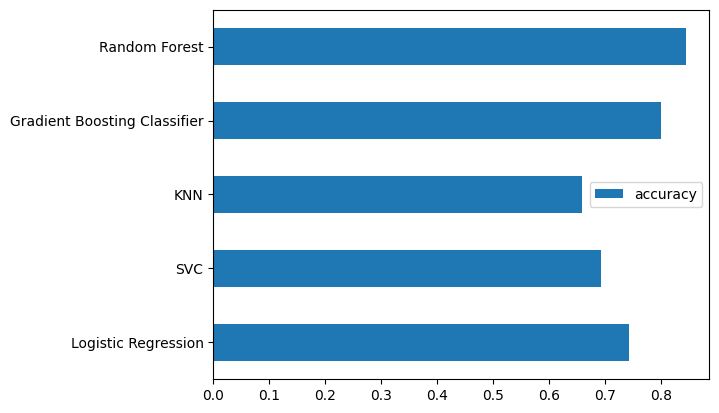

In [ ]:
model_compare = pd.DataFrame(models_score,
                             index = ["accuracy"])
model_compare.T.plot.barh()

### Varience Scaling

In [ ]:
# Making a dictionary to store score
score_dict = {}
# Using pipeline
for name, model in models.items():
  pipe = make_pipeline(StandardScaler(), model)
  pipe.fit(X_train, y_train)
  Pipeline(steps = [('standardscaler', StandardScaler()),
                  name, model])
  # Storing scores in score_dict
  score_dict[name] = pipe.score(X_val, y_val)

In [ ]:
score_dict

{'Logistic Regression': 0.8100558659217877,
 'SVC': 0.8212290502793296,
 'KNN': 0.7821229050279329,
 'Gradient Boosting Classifier': 0.7877094972067039,
 'Random Forest': 0.8603351955307262}

### Model Comparison

<Axes: >

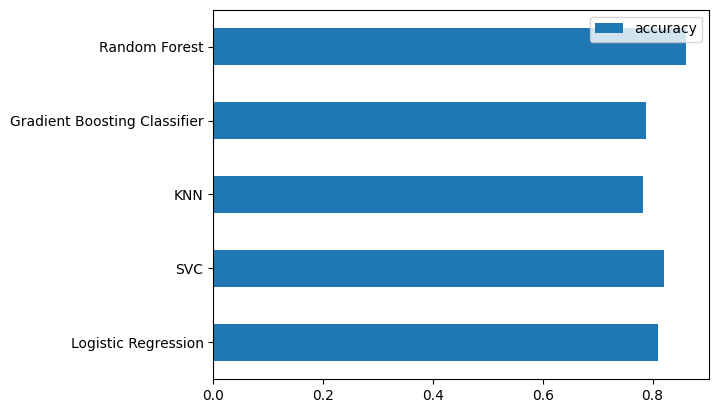

In [ ]:
models_compare = pd.DataFrame(score_dict,
                              index = ["accuracy"])
models_compare.T.plot.barh()

## 6. Experimenting

### HyperParameter Tuning (K-Nearest-Neighbors)

In [ ]:
train_score = []
val_score = []

# Creating a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instances
knn = KNeighborsClassifier()

# Looping through different values of n_neighbors
for i in neighbors:
  knn.set_params(n_neighbors = i, leaf_size = 100)

  # Fit the algorithm
  knn.fit(X_train, y_train)

  # Update the train_score list
  train_score.append(knn.score(X_train, y_train))

  # Updating the test_score list
  val_score.append(knn.score(X_val, y_val))

In [ ]:
train_score

[1.0,
 0.8047752808988764,
 0.8286516853932584,
 0.7542134831460674,
 0.7556179775280899,
 0.7176966292134831,
 0.7148876404494382,
 0.7050561797752809,
 0.7120786516853933,
 0.7120786516853933,
 0.7064606741573034,
 0.6924157303370787,
 0.699438202247191,
 0.6811797752808989,
 0.6952247191011236,
 0.6671348314606742,
 0.6853932584269663,
 0.6713483146067416,
 0.6910112359550562,
 0.6699438202247191]

In [ ]:
val_score

[0.6256983240223464,
 0.6089385474860335,
 0.6312849162011173,
 0.5977653631284916,
 0.659217877094972,
 0.6256983240223464,
 0.664804469273743,
 0.6480446927374302,
 0.6703910614525139,
 0.6871508379888268,
 0.7039106145251397,
 0.6871508379888268,
 0.6983240223463687,
 0.659217877094972,
 0.6927374301675978,
 0.6815642458100558,
 0.6871508379888268,
 0.6759776536312849,
 0.6815642458100558,
 0.659217877094972]

Maximum KNN score on the val data : 70.39%


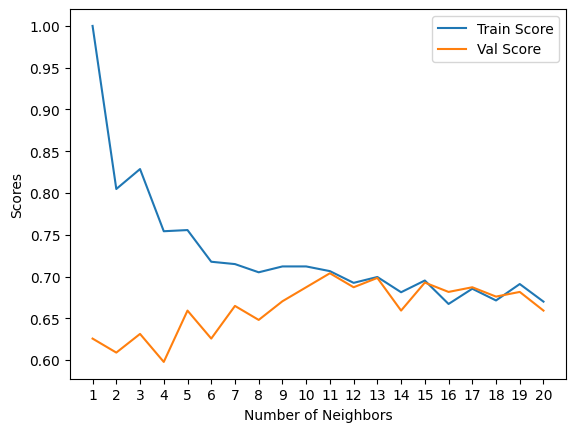

In [ ]:
# Plotting the line graph for train and val score
plt.plot(neighbors, train_score, label = "Train Score")
plt.plot(neighbors, val_score, label = "Val Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Scores")
plt.legend()

print(f"Maximum KNN score on the val data : {max(val_score)*100:.2f}%")

Now we are ignoring the KNN model since the KNN model score is lowest among the trained models even after hyperparameter tuning.

## HyperParameter Tuning using RandomisedSearchCV

In [ ]:
models_score

{'Logistic Regression': 0.7430167597765364,
 'SVC': 0.6927374301675978,
 'KNN': 0.659217877094972,
 'Gradient Boosting Classifier': 0.7988826815642458,
 'Random Forest': 0.8435754189944135}

In [ ]:
score_dict

{'Logistic Regression': 0.8100558659217877,
 'SVC': 0.8212290502793296,
 'KNN': 0.7821229050279329,
 'Gradient Boosting Classifier': 0.7877094972067039,
 'Random Forest': 0.8603351955307262}

In [ ]:
# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {"solver" : ["lbfgs", "sag"],
                "C" : np.logspace(1.0, 20.0, 5),
                "max_iter" : [200, 250, 500],
                "multi_class" : ["auto", "ovr"]}

# Create a hyperparameter grid for SVC
svc_grid = {'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf','linear']}

# Create a hyperparameter grid for GradientBoostingClassifier
gbc_grid = {"n_estimators" : np.arange(100, 1000, 100),
            "criterian" : ["friedman_mse", "squared_error"],
            "max_depth" : [None, 3, 6, 9],
            "min_samples_split" : np.arange(2, 20, 2),
            "min_samples_leaf" : np.arange(1, 20, 2)}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10, 500, 50),
           "max_depth" : [None, 3, 6, 9],
           "min_samples_split" : np.arange(2, 50, 2),
           "min_samples_leaf" : np.arange(1, 50, 2),
           "max_features" : ['auto']}

In [ ]:
# Tuning Logistic Regression Model
# Setup random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                 param_distributions = log_reg_grid,
                                 cv = 5,
                                 n_iter = 20,
                                error_score = 'raise',
                                 verbose = True)

# Fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (

RandomizedSearchCV(cv=5, error_score='raise', estimator=LogisticRegression(),
                   n_iter=20,
                   param_distributions={'C': array([1.00000000e+01, 5.62341325e+05, 3.16227766e+10, 1.77827941e+15,
       1.00000000e+20]),
                                        'max_iter': [200, 250, 500],
                                        'multi_class': ['auto', 'ovr'],
                                        'solver': ['lbfgs', 'sag']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'lbfgs',
 'multi_class': 'ovr',
 'max_iter': 500,
 'C': 562341.3251903491}

In [ ]:
rs_log_reg.score(X_val, y_val)

0.8100558659217877

In [ ]:
models_score

{'Logistic Regression': 0.7430167597765364,
 'SVC': 0.6927374301675978,
 'KNN': 0.659217877094972,
 'Gradient Boosting Classifier': 0.7988826815642458,
 'Random Forest': 0.8435754189944135}

In [ ]:
# Tune RandomForestClassifer
# Setup random hyperparameter search for RandomForest Classifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           verbose = True,
                           n_iter = 20,
                           error_score = 'raise',
                           random_state = 42)

# Fit the random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 6, 9],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])},
                   random_state=42, verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 460,
 'min_samples_split': 10,
 'min_samples_leaf': 7,
 'max_features': 'auto',
 'max_depth': None}

In [ ]:
rs_rf.score(X_val, y_val)

0.8324022346368715

In [ ]:
models_score

{'Logistic Regression': 0.7430167597765364,
 'SVC': 0.6927374301675978,
 'KNN': 0.659217877094972,
 'Gradient Boosting Classifier': 0.7988826815642458,
 'Random Forest': 0.8435754189944135}

## Hyperparameter Tuning with GridSearchCV
Since the score of Random Forest is the highest score so we'll try and improve them again using GridSearchCV.

In [ ]:
# Different hyperparameters for RandomForest Model
rf_grid = {"n_estimators" : np.arange(10, 500, 100),
           "max_depth" : [None, 3],
           "min_samples_split" : np.arange(2, 50, 20),
           "min_samples_leaf" : np.arange(1, 50, 20),
           "max_features" : ['auto']}

# Setup grid hyperparameter search for RandomForest model
gs_rf = GridSearchCV(RandomForestClassifier(),
                          param_grid = rf_grid,
                          cv = 5,
                          verbose=True)

# Fit the grid Hyperparameters search model
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3], 'max_features': ['auto'],
                         'min_samples_leaf': array([ 1, 21, 41]),
                         'min_samples_split': array([ 2, 22, 42]),
                         'n_estimators': array([ 10, 110, 210, 310, 410])},
             verbose=True)

In [ ]:
gs_rf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 110}

In [ ]:
gs_rf.score(X_val, y_val)

0.8379888268156425

In [ ]:
models_score

{'Logistic Regression': 0.7430167597765364,
 'SVC': 0.6927374301675978,
 'KNN': 0.659217877094972,
 'Gradient Boosting Classifier': 0.7988826815642458,
 'Random Forest': 0.8435754189944135}

## Evaluating our Tuned Machine Learning Classifier beyond Accuracy
* ROC Curve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 score

Making predictions before evaluating and comparing our trained model.

In [ ]:
# Make predictions with tuned model
y_preds = gs_rf.predict(X_val)

In [ ]:
y_preds

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [ ]:
y_val

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

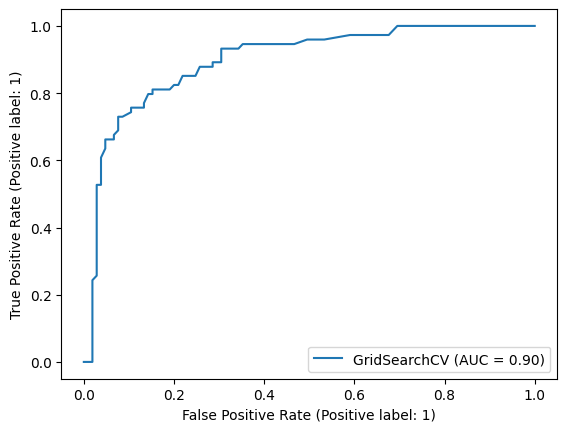

In [ ]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_rf, X_val, y_val)

In [ ]:
# Confusion Metrix
print(confusion_matrix(y_val, y_preds))

[[96  9]
 [20 54]]


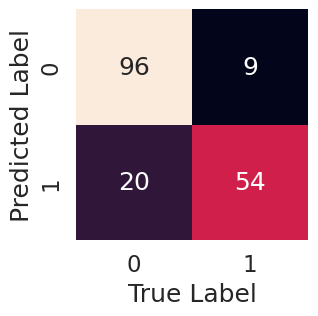

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_val, y_preds):
  """
  Plots a nice confusion matrix using seaborn's heatmap()
  """

  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_val, y_preds),
                   annot=True,
                   cbar=False)
  plt.xlabel("True Label")
  plt.ylabel("Predicted Label")

plot_conf_mat(y_val, y_preds)

In [ ]:
# Classification Report
print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       105
           1       0.86      0.73      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



#### Calculating Evaluation Matrix using Cross-Validation

In [ ]:
# Checking the best hyperparameters
gs_rf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 110}

In [ ]:
# Create a new classifier with best parameters
clf = RandomForestClassifier(max_depth = None,
                            max_features = "auto",
                            min_samples_leaf = 1,
                            min_samples_split = 2,
                            n_estimators = 110)

In [ ]:
# Cross - Validation Accuracy
cv_acc = cross_val_score(clf, X, y, scoring = "accuracy")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [ ]:
cv_acc

array([0.79888268, 0.82022472, 0.85955056, 0.83146067, 0.85955056])

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8339338396836358

In [ ]:
# Cross - Validation Precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring = "precision")
cv_precision = np.mean(cv_precision)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [ ]:
cv_precision

0.8276706070747195

In [ ]:
# Cross - Validation Recall
cv_recall = cross_val_score(clf, X, y, scoring = "recall")
cv_recall = np.mean(cv_recall)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [ ]:
cv_recall

0.7398124467178177

In [ ]:
# Cross - Validation f1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [ ]:
cv_f1

0.7572945055961987

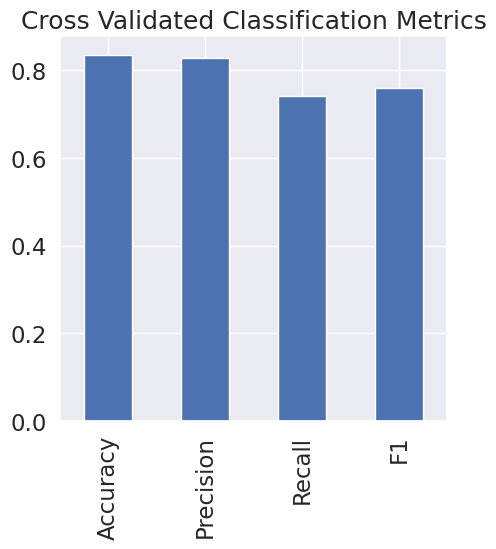

In [ ]:
# Visualise our cross-validation matrix
cv_matrix = pd.DataFrame({"Accuracy" : cv_acc,
                          "Precision" : cv_precision,
                          "Recall" : cv_recall,
                          "F1" : cv_f1},
                         index=[0])

cv_matrix.T.plot.bar(figsize=(5,5),
                      title = "Cross Validated Classification Metrics",
                      legend=False);

## Loading the test file

In [ ]:
# Loading the test dataset
df_test = pd.read_csv("drive/MyDrive/Titanic-Survival/test.csv")

In [ ]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Making a copy of test data

In [ ]:
df_copy = df_test.copy()

In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Converting String values into Categorical Values for test data

In [ ]:
# Find the columns having String Data Type
for label, content in df_copy.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

Name
Sex
Ticket
Cabin
Embarked


In [ ]:
# Converting the string values into categorical values
for label, value in df_copy.items():
  if pd.api.types.is_string_dtype(value):
     df_copy[label] = value.astype("category").cat.as_ordered()

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    category
 3   Sex          418 non-null    category
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    category
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     category
 10  Embarked     418 non-null    category
dtypes: category(5), float64(2), int64(4)
memory usage: 55.8 KB


## Converting Categorical Values into numeric values (of test data)

In [ ]:
# Check for columns with non-numeric values
for label, content in df_copy.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

Name
Sex
Ticket
Cabin
Embarked


In [ ]:
# Turning the Categorical data into numbers and filling the missing values
for label, content in df_copy.items():
  if not pd.api.types.is_numeric_dtype(content):
    # Add a binary column to indicate whether the sample had missing values
    df_copy[label + "_is_missing"] = pd.isnull(content)
    # Turn the Categories into numbers
    df_copy[label] = pd.Categorical(content).codes + 1

In [ ]:
# Checking if there is any categorical value
for label, content in df_copy.items():
  if not pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

## Filling the missing numeric values of the test data

In [ ]:
# Finding the columns having Numeric data type
for label, content in df_copy.items():
  if(pd.api.types.is_numeric_dtype(content)):
    print(label)

PassengerId
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked
Name_is_missing
Sex_is_missing
Ticket_is_missing
Cabin_is_missing
Embarked_is_missing


In [ ]:
# Check for which numeric column values are null
for label, content in df_copy.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

Age
Fare


In [ ]:
# Filling the median in numeric rows
for label, content in df_copy.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Adding a binary column which tells us if the data is missing
      df_copy[label + "_is_missing"] = pd.isnull(content)
      # Filling the missing numeric value
      df_copy[label] = content.fillna(content.median())

In [ ]:
# Check for which numeric column values are still null
for label, content in df_copy.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

## Saving the preprocessed data of test dataset

In [ ]:
# Exporting df_tmp data frame
df_copy.to_csv("drive/MyDrive/Titanic-Survival/test_tmp.csv",
              index = False)

## Importing the preprocessed data of test set

In [ ]:
df_test = pd.read_csv("drive/MyDrive/Titanic-Survival/test_tmp.csv")

In [ ]:
df_test.drop("Fare_is_missing", axis = 1, inplace = True)

In [ ]:
# Making predictions on test data
test_preds = clf.predict(df_test)

In [ ]:
test_preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# Save predictions (Numpy array) to csv file (for later access)
np.savetxt("drive/MyDrive/Titanic-Survival/preds_array.csv", test_preds, delimiter = ",")

In [ ]:
# Load the predictions
test_preds = np.loadtxt("drive/MyDrive/Titanic-Survival/preds_array.csv",  delimiter = ",")

In [ ]:
test_preds.shape

(418,)

## Preparing Test Data For Submission

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Pclass               418 non-null    int64  
 2   Name                 418 non-null    int64  
 3   Sex                  418 non-null    int64  
 4   Age                  418 non-null    float64
 5   SibSp                418 non-null    int64  
 6   Parch                418 non-null    int64  
 7   Ticket               418 non-null    int64  
 8   Fare                 418 non-null    float64
 9   Cabin                418 non-null    int64  
 10  Embarked             418 non-null    int64  
 11  Name_is_missing      418 non-null    bool   
 12  Sex_is_missing       418 non-null    bool   
 13  Ticket_is_missing    418 non-null    bool   
 14  Cabin_is_missing     418 non-null    bool   
 15  Embarked_is_missing  418 non-null    boo

In [ ]:
passenger_id = df_test["PassengerId"]

In [ ]:
test_preds = test_preds.astype(int)

In [ ]:
# Create a pandas DataFrame
preds_df = pd.DataFrame({"PassengerId" : passenger_id,
                         "Survived" : test_preds})
preds_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
len(preds_df)

418

In [ ]:
# Save our predictions dataframe to CSV for submission
preds_df.to_csv("drive/MyDrive/Titanic-Survival/submission.csv",
                index = False)